In [79]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd

# Load data set

In [2]:
english_dataset = load_dataset("amazon_reviews_multi", "en")

Found cached dataset amazon_reviews_multi (C:/Users/Rodrigo/.cache/huggingface/datasets/amazon_reviews_multi/es/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset amazon_reviews_multi (C:/Users/Rodrigo/.cache/huggingface/datasets/amazon_reviews_multi/en/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
def show_samples(dataset, num_samples=3, seed=18):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"\n'Title: {example['review_title']}'")
        print(f"'Review: {example['review_body']}'")

def filter_books(example):
    return (
        example["product_category"] == "book"
        or example["product_category"] == "digital_ebook_purchase"
    )

In [4]:
show_samples(english_dataset)

Loading cached shuffled indices for dataset at C:\Users\Rodrigo\.cache\huggingface\datasets\amazon_reviews_multi\en\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-9eaa0e38cca0d6fe.arrow



'Title: :('
'Review: Unfortunately, it did not work for my son.'

'Title: cute socks'
'Review: They are cute socks but I was hoping for more support around my arches where I need it most. I would have given more stars for more support. They get three for looks.'

'Title: Had no idea this could rip paint off the wall.'
'Review: Ripped paint off the wall. Had no idea this could happen. Put plenty on to more than hold the picture per instructions. Came in the next day to find picture hanging by one hook and other hook and paint torn off the wall.'


# Exploratory data analysis

## Product field

In [6]:
english_dataset.set_format("pandas")
english_df = english_dataset["train"][:]
# Show counts for top 20 products
english_df["product_category"].value_counts()[:20]

home                      17679
apparel                   15951
wireless                  15717
other                     13418
beauty                    12091
drugstore                 11730
kitchen                   10382
toy                        8745
sports                     8277
automotive                 7506
lawn_and_garden            7327
home_improvement           7136
pet_products               7082
digital_ebook_purchase     6749
pc                         6401
electronics                6186
office_product             5521
shoes                      5197
grocery                    4730
book                       3756
Name: product_category, dtype: int64

In [8]:
print(f'Number of distinct products: {english_df["product_category"].nunique()}')

Number of distinct products: 31


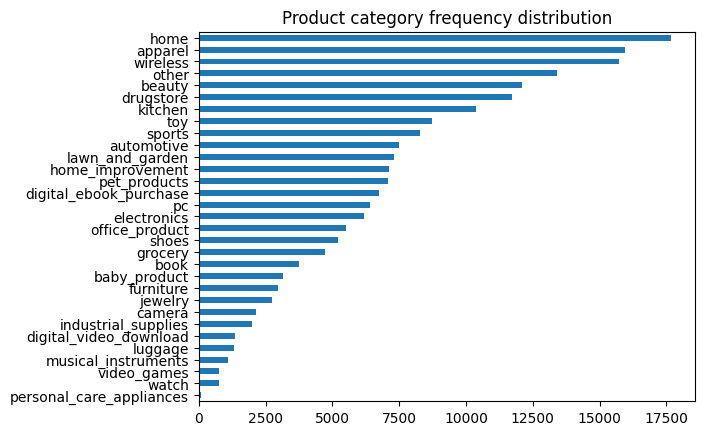

In [14]:
english_df["product_category"].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Product category frequency distribution');

In [17]:
english_dataset.reset_format()

In [37]:
books_dataset = english_dataset.filter(filter_books)
show_samples(books_dataset)

Loading cached processed dataset at C:\Users\Rodrigo\.cache\huggingface\datasets\amazon_reviews_multi\en\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-850cccae20e66d85.arrow
Loading cached processed dataset at C:\Users\Rodrigo\.cache\huggingface\datasets\amazon_reviews_multi\en\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-2269bd0a5cf796de.arrow
Loading cached processed dataset at C:\Users\Rodrigo\.cache\huggingface\datasets\amazon_reviews_multi\en\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-5a6ac670b2564c86.arrow
Loading cached shuffled indices for dataset at C:\Users\Rodrigo\.cache\huggingface\datasets\amazon_reviews_multi\en\1.0.0\724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609\cache-1c34daf4d719903c.arrow



'Title: A wonderful true story'
'Review: I laughed and cried in every chapter'

'Title: Three Stars'
'Review: Not quite what I thought it would be.'

'Title: A stunning and uncompromising novel'
'Review: I didn't really know what to expect from this book. I didn't finish 'Pennies', the first book in the series, because I found it a bit too dark. But 'Dollars', though dark, was a different beast entirely. This novel is certainly bleak, but whereas the first in the series focused on physical violence, this one focuses on the aftermath of violence. Characters are nuanced and beautifully flawed and 'Dollars' is an amazing character-driven story about people determined to keep living, despite their terrible past.'


In [83]:
books_dataset['train'].shape

(10505, 8)

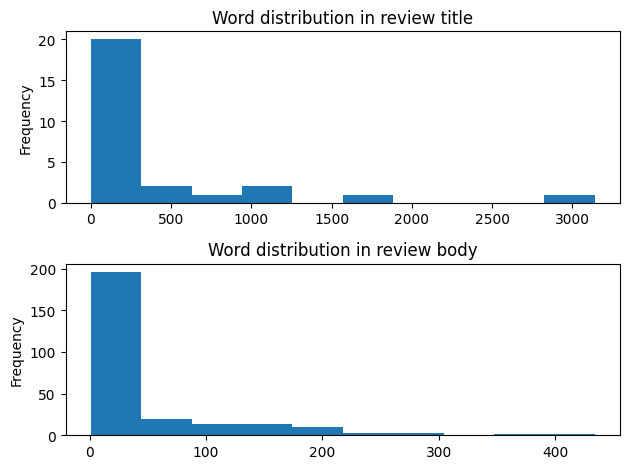

In [72]:
books_dataset.set_format('pandas')

fig, axs = plt.subplots(2,1)
books_dataset['train']['review_title'].apply(lambda x: len(x.split())).value_counts().plot(kind='hist', ax=axs[0])
axs[0].set_title('Word distribution in review title')
books_dataset['train']['review_body'].apply(lambda x: len(x.split())).value_counts().plot(kind='hist', ax=axs[1])
axs[1].set_title('Word distribution in review body')
fig.tight_layout();

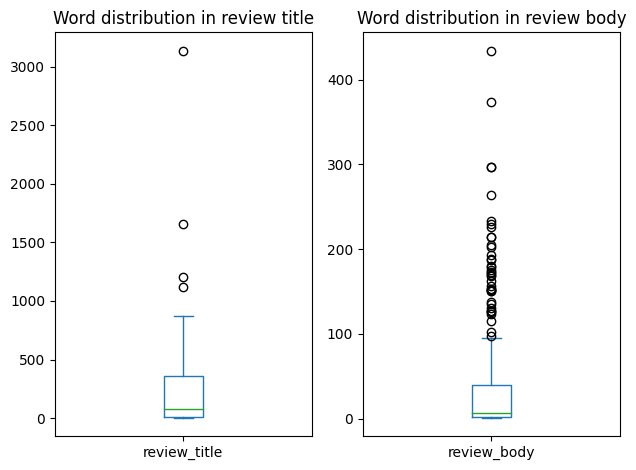

In [73]:
fig, axs = plt.subplots(1,2)
books_dataset['train']['review_title'].apply(lambda x: len(x.split())).value_counts().plot(kind='box', ax=axs[0])
axs[0].set_title('Word distribution in review title')
books_dataset['train']['review_body'].apply(lambda x: len(x.split())).value_counts().plot(kind='box', ax=axs[1])
axs[1].set_title('Word distribution in review body')
fig.tight_layout();

In [84]:
pd.DataFrame({'word_stats_title': books_dataset['train']['review_title'].apply(lambda x: len(x.split())).describe(),
              'word_stats_body': books_dataset['train']['review_body'].apply(lambda x: len(x.split())).describe()
              })

,word_stats_title,word_stats_body
count,10505.000000,10505.000000
mean,4.254069,39.047120
std,3.501997,37.912044
min,1.000000,2.000000
25%,2.000000,18.000000
50%,3.000000,28.000000
75%,5.000000,49.000000
max,27.000000,560.000000


In [85]:
# removing short reviews
books_dataset = books_dataset.filter(lambda x: len(x["review_title"].split()) > 2)

Filter:   0%|          | 0/10505 [00:00<?, ? examples/s]

Filter:   0%|          | 0/231 [00:00<?, ? examples/s]

Filter:   0%|          | 0/278 [00:00<?, ? examples/s]

In [86]:
pd.DataFrame({'word_stats_title': books_dataset['train']['review_title'].apply(lambda x: len(x.split())).describe(),
              'word_stats_body': books_dataset['train']['review_body'].apply(lambda x: len(x.split())).describe()
              })

,word_stats_title,word_stats_body
count,6162.000000,6162.000000
mean,6.038137,45.584713
std,3.614926,42.027353
min,3.000000,3.000000
25%,3.000000,21.000000
50%,5.000000,33.000000
75%,7.000000,56.000000
max,27.000000,560.000000


# Preprocessing

In [88]:
from transformers import AutoTokenizer

model_checkpoint = "google/mt5-small"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

c:\Users\Rodrigo\miniconda3\envs\py3108\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Rodrigo\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


ValueError: Couldn't instantiate the backend tokenizer from one of: 
(1) a `tokenizers` library serialization file, 
(2) a slow tokenizer instance to convert or 
(3) an equivalent slow tokenizer class to instantiate and convert. 
You need to have sentencepiece installed to convert a slow tokenizer to a fast one.

In [ ]:
inputs = tokenizer("I loved reading the Hunger Games!")
inputs

In [ ]:
tokenizer.convert_ids_to_tokens(inputs.input_ids)

In [ ]:
max_input_length = 512
max_target_length = 30


def preprocess_function(examples):
    model_inputs = tokenizer(
        examples["review_body"],
        max_length=max_input_length,
        truncation=True,
    )
    labels = tokenizer(
        examples["review_title"], max_length=max_target_length, truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
tokenized_datasets = books_dataset.map(preprocess_function, batched=True)

In [ ]:
generated_summary = "I absolutely loved reading the Hunger Games"
reference_summary = "I loved reading the Hunger Games"

In [ ]:
import evaluate

rouge_score = evaluate.load("rouge")

In [ ]:
scores = rouge_score.compute(
    predictions=[generated_summary], references=[reference_summary]
)
scores

In [ ]:
scores["rouge1"].mid

In [ ]:
from nltk.tokenize import sent_tokenize


def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])


print(three_sentence_summary(books_dataset["train"][1]["review_body"]))

In [ ]:
from nltk.tokenize import sent_tokenize


def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])


print(three_sentence_summary(books_dataset["train"][1]["review_body"]))

In [ ]:
def evaluate_baseline(dataset, metric):
    summaries = [three_sentence_summary(text) for text in dataset["review_body"]]
    return metric.compute(predictions=summaries, references=dataset["review_title"])

In [ ]:
import pandas as pd

score = evaluate_baseline(books_dataset["validation"], rouge_score)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = dict((rn, round(score[rn].mid.fmeasure * 100, 2)) for rn in rouge_names)
rouge_dict